In [1]:
import numpy as np
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
# import plotly.express as px
import seaborn as sns
import pickle

hfont = {'fontname':'Myriad Pro'}
import matplotlib.ticker as mtick
from matplotlib import gridspec
import matplotlib.colors as colors
import sys
sys.path.append(os.path.join(Path(os.getcwd()).parents[0], "functions"))
import helper_functions as hfn
import inputfraction_functions as fracfn

In [2]:
path = Path(os.getcwd()).parents[0]

fracpath = os.path.join(path, 'input_fraction')
fracpath_csv = os.path.join(fracpath, 'csv')

paramspath = os.path.join(path, 'compare_linfit_params')

# datapath= os.path.join(path, 'data')

figpath = os.path.join(path, 'Figures')
hfn.dir_check(figpath)
    
figs45path = os.path.join(figpath, 'FigS4_5')
hfn.dir_check(figs45path)

figs45panelpaths = os.path.join(figs45path, 'panels')
hfn.dir_check(figs45panelpaths)

# Panel A - plot V1 vs PM data based on input fraction

In [3]:
areas_sel = ['VISp','VISpm','VISl', 'VISam', 'VISal', 'RSPagl', 'RSPd', 'RSPv', 'AM', 'LD', 'LP', 'LGd', 'ORB', 'ACA', 'MOs', 'CLA', 'PTLp', 'TEa', 'AUD',]

In [4]:
df_frac = pd.read_csv(os.path.join(fracpath_csv, 'df_all_fraction.csv'))

In [5]:
df_frac.loc[df_frac['starter'] > 200, 'starter_cat'] = 'high'
df_frac.loc[df_frac['starter'] < 200, 'starter_cat'] = 'low'

In [6]:
df_frac_s = pd.DataFrame()
for area in areas_sel:
    this_frac = df_frac[['starter', 'starter_cat', 'target area','area', area]].reset_index(drop = True)
    this_frac['input_area'] = area
    this_frac.columns = ['starter', 'starter_cat','targeted_area','target_area', 'input_fraction', 'area']
    df_frac_s = pd.concat([df_frac_s, this_frac], axis = 0).reset_index(drop = True)

In [7]:
df_frac_s['grouped_area'] = 'Dist_ctx'
df_frac_s.loc[df_frac_s['area'].isin(['VISp', 'VISpm', 'VISl', 'VISam', 'VISal']), 'grouped_area'] = 'VIS'

df_frac_s.loc[df_frac_s['area'].isin(['LGd', 'LP', 'LD', 'AM']), 'grouped_area'] = 'Thal'

df_frac_s.loc[df_frac_s['area'].isin(['RSPd', 'RSPv', 'RSPagl']), 'grouped_area'] = 'RSP'

In [9]:
df_frac_s[df_frac_s.target_area == 'PM']

,starter,starter_cat,targeted_area,target_area,input_fraction,area,grouped_area
2,8,low,PM,PM,0.146709,VISp,VIS
8,63,low,PM,PM,0.136444,VISp,VIS
10,117,low,PM,PM,0.143791,VISp,VIS
11,122,low,PM,PM,0.202210,VISp,VIS
15,207,high,PM,PM,0.085837,VISp,VIS
...,...,...,...,...,...,...,...
521,338,high,PM,PM,0.051251,AUD,Dist_ctx
523,482,high,PM,PM,0.031692,AUD,Dist_ctx
524,516,high,PM,PM,0.050280,AUD,Dist_ctx
526,776,high,PM,PM,0.050919,AUD,Dist_ctx


In [10]:
result = df_frac_s.groupby(['area', 'target_area'], as_index=False).agg(
                      {'input_fraction':['mean','std', 'count']})

In [11]:
palette ={"V1": "darkblue", "PM": "royalblue"}


In [12]:
df_frac_s=df_frac_s[(df_frac_s['target_area']=='V1') | (df_frac_s['target_area']=='PM')]

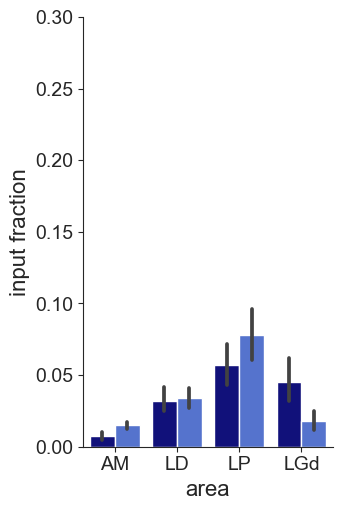

In [13]:
sns.set_style("ticks")
sns.catplot(data = df_frac_s[df_frac_s.grouped_area == 'Thal'],  x = 'area', y ='input_fraction', hue = 'target_area', kind="bar", legend=False, palette = palette)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(3, 5)

plt.ylabel('input fraction', fontsize = 16)
plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.ylim(0,0.3)

fig.savefig(os.path.join(figs45panelpaths, 'figS4_5a1_v2.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs45panelpaths, 'figS4_5a1_v2.eps'),  bbox_inches='tight', format = 'eps')

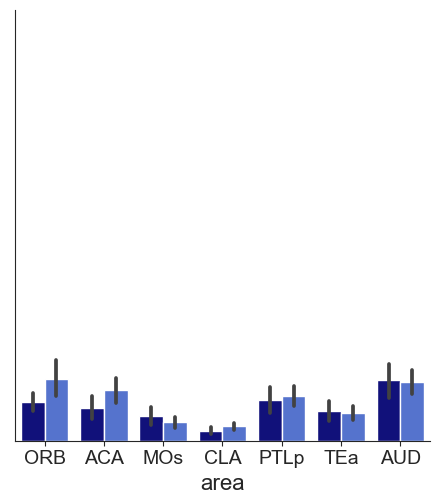

In [14]:
sns.catplot(data = df_frac_s[df_frac_s.grouped_area == 'Dist_ctx'],  x = 'area', y ='input_fraction', hue = 'target_area', kind="bar", legend=False, palette = palette)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(5,5)

plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.ylim(0, 0.3)
ax.get_yaxis().set_visible(False)

fig.savefig(os.path.join(figs45panelpaths, 'figS4_5a2v2.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs45panelpaths, 'figS4_5a2v2.eps'),  bbox_inches='tight', format = 'eps')

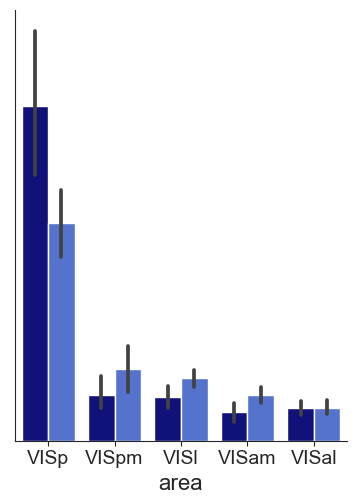

In [15]:
sns.catplot(data = df_frac_s[df_frac_s.grouped_area == 'VIS'],  x = 'area', y ='input_fraction', hue = 'target_area', kind="bar", legend=False, palette = palette)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(4, 5)
plt.ylim(0, 0.3)

ax.get_yaxis().set_visible(False)

plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
ax.get_yaxis().set_visible(False)

fig.savefig(os.path.join(figs45panelpaths, 'figS4_5a3v2.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs45panelpaths, 'figS4_5a3v2.eps'),  bbox_inches='tight', format = 'eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


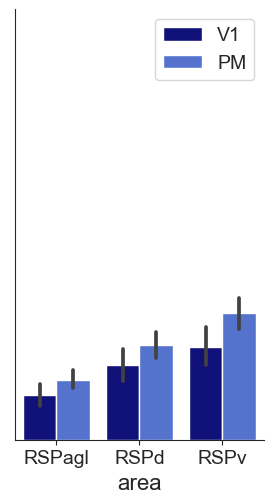

In [16]:
sns.catplot(data = df_frac_s[df_frac_s.grouped_area == 'RSP'],  x = 'area', y ='input_fraction', hue = 'target_area', kind="bar", legend=False, palette = palette)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(3, 5)

plt.legend(loc = 'upper right', fontsize = 14)
plt.ylim(0, 0.3)

ax.get_yaxis().set_visible(False)

plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
ax.get_yaxis().set_visible(False)

fig.savefig(os.path.join(figs45panelpaths, 'figS4_5a4v2.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs45panelpaths, 'figS4_5a4v2.eps'),  bbox_inches='tight', format = 'eps')

# Panel A1 - plot V1 vs PM based on input fraction - high starters only

In [17]:
df_frac_h = df_frac_s[df_frac_s.starter_cat == 'high']

In [18]:
df_frac_h

,starter,starter_cat,targeted_area,target_area,input_fraction,area,grouped_area
15,207,high,PM,PM,0.085837,VISp,VIS
16,320,high,PM,PM,0.180160,VISp,VIS
17,338,high,PM,PM,0.085937,VISp,VIS
19,482,high,PM,PM,0.129252,VISp,VIS
20,516,high,PM,PM,0.178116,VISp,VIS
...,...,...,...,...,...,...,...
527,908,high,V1,V1,0.060056,AUD,Dist_ctx
528,1140,high,V1,V1,0.064009,AUD,Dist_ctx
529,1474,high,V1,V1,0.067593,AUD,Dist_ctx
530,1488,high,PM,PM,0.061474,AUD,Dist_ctx


In [19]:
result_h= df_frac_h.groupby(['area', 'target_area'], as_index=False).agg(
                      {'input_fraction':['mean','std', 'count']})

In [20]:
df_frac_h=df_frac_h[(df_frac_h['target_area']=='V1') | (df_frac_h['target_area']=='PM')]

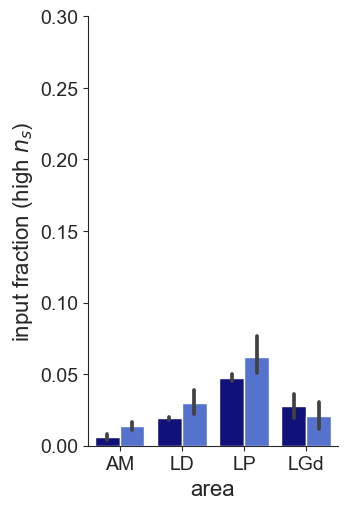

In [21]:
sns.set_style("ticks")
sns.catplot(data = df_frac_h[df_frac_h.grouped_area == 'Thal'],  x = 'area', y ='input_fraction', hue = 'target_area', hue_order = ['V1', 'PM'], kind="bar", legend=False, palette = palette)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(3, 5)

plt.ylabel('input fraction (high $n_s$)', fontsize = 16)
plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.ylim(0,0.3)

fig.savefig(os.path.join(figs45panelpaths, 'figS4_5a1_v2_high.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs45panelpaths, 'figS4_5a1_v2_high.eps'),  bbox_inches='tight', format = 'eps')

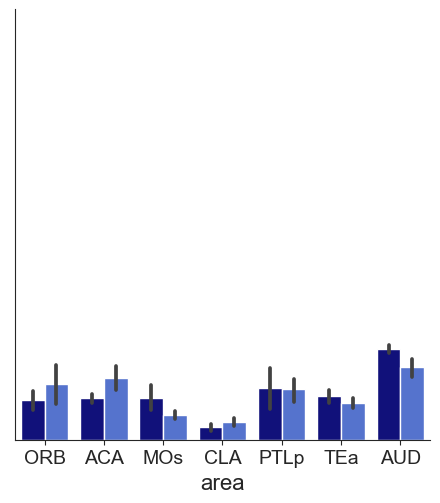

In [22]:
sns.catplot(data = df_frac_h[df_frac_h.grouped_area == 'Dist_ctx'],  x = 'area', y ='input_fraction', hue = 'target_area', hue_order = ['V1', 'PM'], kind="bar", legend=False, palette = palette)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(5,5)

plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.ylim(0, 0.3)
ax.get_yaxis().set_visible(False)

fig.savefig(os.path.join(figs45panelpaths, 'figS4_5a2v2_high.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs45panelpaths, 'figS4_5a2v2_high.eps'),  bbox_inches='tight', format = 'eps')

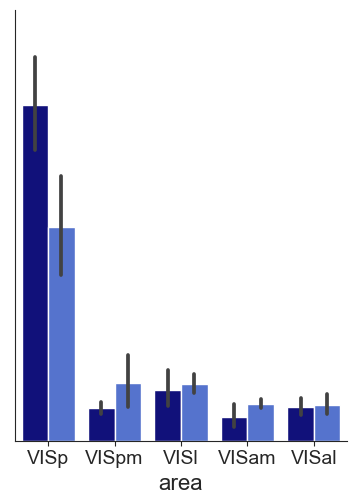

In [23]:
sns.catplot(data = df_frac_h[df_frac_h.grouped_area == 'VIS'],  x = 'area', y ='input_fraction', hue = 'target_area', hue_order = ['V1', 'PM'], kind="bar", legend=False, palette = palette)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(4, 5)
plt.ylim(0, 0.3)

ax.get_yaxis().set_visible(False)

plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
ax.get_yaxis().set_visible(False)

fig.savefig(os.path.join(figs45panelpaths, 'figS4_5a3v2_high.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs45panelpaths, 'figS4_5a3v2_high.eps'),  bbox_inches='tight', format = 'eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


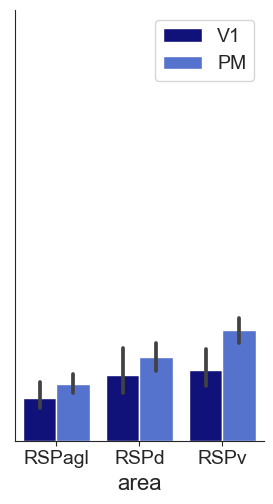

In [24]:
sns.catplot(data = df_frac_h[df_frac_h.grouped_area == 'RSP'],  x = 'area', y ='input_fraction', hue = 'target_area', hue_order = ['V1', 'PM'], kind="bar", legend=False, palette = palette)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(3, 5)

plt.legend(loc = 'upper right', fontsize = 14)
plt.ylim(0, 0.3)

ax.get_yaxis().set_visible(False)

plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
ax.get_yaxis().set_visible(False)

fig.savefig(os.path.join(figs45panelpaths, 'figS4_5a4v2_high.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs45panelpaths, 'figS4_5a4v2_high.eps'),  bbox_inches='tight', format = 'eps')

In [25]:
df_frac_h[df_frac_h.target_area == 'PM']

,starter,starter_cat,targeted_area,target_area,input_fraction,area,grouped_area
15,207,high,PM,PM,0.085837,VISp,VIS
16,320,high,PM,PM,0.180160,VISp,VIS
17,338,high,PM,PM,0.085937,VISp,VIS
19,482,high,PM,PM,0.129252,VISp,VIS
20,516,high,PM,PM,0.178116,VISp,VIS
...,...,...,...,...,...,...,...
521,338,high,PM,PM,0.051251,AUD,Dist_ctx
523,482,high,PM,PM,0.031692,AUD,Dist_ctx
524,516,high,PM,PM,0.050280,AUD,Dist_ctx
526,776,high,PM,PM,0.050919,AUD,Dist_ctx


In [26]:
# make summary df for statistics

In [27]:
df_frac_s_v1 = df_frac_s[df_frac_s.target_area == 'V1']
df_frac_s_pm = df_frac_s[df_frac_s.target_area == 'PM']

In [28]:
df_frac_h_v1 = df_frac_h[df_frac_h.target_area == 'V1']
df_frac_h_pm = df_frac_h[df_frac_h.target_area == 'PM']

In [29]:
df_frac_s_v1[df_frac_s_v1.area == 'VISp'].shape

(12, 7)

In [30]:
df_frac_s_pm[df_frac_s_pm.area == 'VISp'].shape

(11, 7)

In [31]:
res_v1 = df_frac_s_v1.groupby(['area'], as_index=False).agg({'input_fraction':['mean', 'std']})
res_pm = df_frac_s_pm.groupby(['area'], as_index=False).agg({'input_fraction':['mean', 'std']})

In [32]:
res_h_v1 = df_frac_h_v1.groupby(['area'], as_index=False).agg({'input_fraction':['mean', 'std']})
res_h_pm = df_frac_h_pm.groupby(['area'], as_index=False).agg({'input_fraction':['mean', 'std']})

In [33]:
df_frac_h_v1[df_frac_h_v1.area == 'VISp'].shape

(4, 7)

In [34]:
df_frac_h_pm[df_frac_h_pm.area == 'VISp'].shape

(7, 7)

In [35]:
res_h_pm

area input_fraction          
                     mean       std
0      ACA       0.042908  0.012401
1       AM       0.013753  0.004382
2      AUD       0.050547  0.009719
3      CLA       0.012564  0.003864
4       LD       0.030056  0.012642
5      LGd       0.020789  0.014286
6       LP       0.062045  0.018537
7      MOs       0.017135  0.004497
8      ORB       0.038478  0.020409
9     PTLp       0.035000  0.011332
10  RSPagl       0.039689  0.009676
11    RSPd       0.058514  0.014919
12    RSPv       0.076782  0.012693
13     TEa       0.025569  0.004687
14   VISal       0.025187  0.009971
15   VISam       0.025665  0.004827
16    VISl       0.039672  0.009892
17    VISp       0.148648  0.051100
18   VISpm       0.039924  0.027330

# Panel B - plot V1 vs PM data based on intercept

In [36]:
areas_sel = ['VISp','VISpm','VISl', 'VISam', 'VISal', 'RSPagl', 'RSPd', 'RSPv', 'AM', 'LD', 'LP', 'LGd', 'ORB', 'ACA', 'MOs', 'CLA', 'PTLp', 'TEa', 'AUD']

In [37]:
areas_sel_noLGd = ['VISp','VISpm','VISl', 'VISam', 'VISal', 'RSPagl', 'RSPd', 'RSPv', 'AM', 'LD', 'LP', 'ORB', 'ACA', 'MOs', 'CLA', 'PTLp', 'TEa', 'AUD']

In [38]:
def add_func_areas(df):
    df['func area'] = 0
    df.loc[df['area'].isin(list_VIS), 'func area'] = 'VIS'
    df.loc[df['area'].isin(list_RSP), 'func area'] = 'RSP'
    df.loc[df['area'].isin(list_Thal), 'func area'] = 'Thal'
    df.loc[df['area'].isin(list_Dist_ctx), 'func area'] = 'Dist_ctx'
    df["func area"].replace({0: "whole brain"}, inplace=True)
    return df

In [39]:
int_V1_log = pd.read_csv(os.path.join(paramspath,'df_CI95_int_targets_V1.csv'))
int_V1_log = int_V1_log.drop(int_V1_log.columns[[0]], axis=1) 

int_V1_lin = pd.read_csv(os.path.join(paramspath,'df_CI95_int_targets_V1_lin.csv'))
int_V1_lin = int_V1_lin.drop(int_V1_lin.columns[[0]], axis=1) 

In [40]:
int_PM_log = pd.read_csv(os.path.join(paramspath,'df_CI95_int_targets_PM.csv'))
int_PM_log = int_PM_log.drop(int_PM_log.columns[[0]], axis=1) 

int_PM_lin = pd.read_csv(os.path.join(paramspath,'df_CI95_int_targets_PM_lin.csv'))
int_PM_lin = int_PM_lin.drop(int_PM_lin.columns[[0]], axis=1) 

In [41]:
int_V1_log = int_V1_log[int_V1_log.area.isin(areas_sel_noLGd)].reset_index(drop = True)
int_PM_log = int_PM_log[int_PM_log.area.isin(areas_sel_noLGd)].reset_index(drop = True)

In [42]:
int_V1_log['grouped_area'] = 'Dist_ctx'
int_V1_log.loc[int_V1_log['area'].isin(['VISp', 'VISpm', 'VISl', 'VISam', 'VISal']), 'grouped_area'] = 'VIS'

int_V1_log.loc[int_V1_log['area'].isin(['LGd', 'LP', 'LD', 'AM']), 'grouped_area'] = 'Thal'

int_V1_log.loc[int_V1_log['area'].isin(['RSPd', 'RSPv', 'RSPagl']), 'grouped_area'] = 'RSP'

In [43]:
int_PM_log['grouped_area'] = 'Dist_ctx'
int_PM_log.loc[int_PM_log['area'].isin(['VISp', 'VISpm', 'VISl', 'VISam', 'VISal']), 'grouped_area'] = 'VIS'

int_PM_log.loc[int_PM_log['area'].isin(['LGd', 'LP', 'LD', 'AM']), 'grouped_area'] = 'Thal'

int_PM_log.loc[int_PM_log['area'].isin(['RSPd', 'RSPv', 'RSPagl']), 'grouped_area'] = 'RSP'

In [44]:
int_PM_lin['grouped_area'] = 'Thal'
int_V1_lin['grouped_area'] = 'Thal'

In [45]:
int_PM_lin[['mean int', 'median int', '95%quant-low', '95%quant-high']] = int_PM_lin[['mean int', 'median int', '95%quant-low', '95%quant-high']].apply(lambda x: np.log10(x))#np.log10(x))
int_V1_lin[['mean int', 'median int', '95%quant-low', '95%quant-high']] = int_V1_lin[['mean int', 'median int', '95%quant-low', '95%quant-high']].apply(lambda x: np.log10(x))#np.log10(x))

In [46]:
int_PM_log['target'] = 'PM'
int_PM_lin['target'] = 'PM'

int_V1_log['target'] = 'V1'
int_V1_lin['target'] = 'V1'

In [47]:
int_PM_log = pd.concat([int_PM_log, int_PM_lin], axis = 0).reset_index(drop = True)
int_V1_log = pd.concat([int_V1_log, int_V1_lin], axis = 0).reset_index(drop = True)

In [48]:
int_log = pd.concat([int_V1_log, int_PM_log], axis = 0).reset_index(drop = True)

In [49]:
int_PM_log_Thal = int_PM_log[int_PM_log.grouped_area == 'Thal']
int_V1_log_Thal = int_V1_log[int_V1_log.grouped_area == 'Thal']

In [50]:
int_PM_errors_Thal = [int_PM_log_Thal['mean int'].values-int_PM_log_Thal['95%quant-low'].values, int_PM_log_Thal['95%quant-high'].values-int_PM_log_Thal['mean int'].values]
int_V1_errors_Thal = [int_V1_log_Thal['95%quant-low'].values-int_V1_log_Thal['mean int'].values, int_V1_log_Thal['mean int'].values-int_V1_log_Thal['95%quant-high'].values]

In [51]:
int_PM_log_VIS = int_PM_log[int_PM_log.grouped_area == 'VIS']
int_V1_log_VIS = int_V1_log[int_V1_log.grouped_area == 'VIS']

In [52]:
int_PM_errors_VIS = [int_PM_log_VIS['mean int'].values-int_PM_log_VIS['95%quant-low'].values, int_PM_log_VIS['95%quant-high'].values-int_PM_log_VIS['mean int'].values]
int_V1_errors_VIS = [int_V1_log_VIS['95%quant-low'].values-int_V1_log_VIS['mean int'].values, int_V1_log_VIS['mean int'].values-int_V1_log_VIS['95%quant-high'].values]

In [53]:
int_PM_log_Dist = int_PM_log[int_PM_log.grouped_area == 'Dist_ctx']
int_V1_log_Dist = int_V1_log[int_V1_log.grouped_area == 'Dist_ctx']

In [54]:
int_PM_errors_Dist = [int_PM_log_Dist['mean int'].values-int_PM_log_Dist['95%quant-low'].values, int_PM_log_Dist['95%quant-high'].values-int_PM_log_Dist['mean int'].values]
int_V1_errors_Dist = [int_V1_log_Dist['95%quant-low'].values-int_V1_log_Dist['mean int'].values, int_V1_log_Dist['mean int'].values-int_V1_log_Dist['95%quant-high'].values]

In [55]:
int_PM_log_RSP = int_PM_log[int_PM_log.grouped_area == 'RSP']
int_V1_log_RSP = int_V1_log[int_V1_log.grouped_area == 'RSP']

In [56]:
int_PM_errors_RSP = [int_PM_log_RSP['mean int'].values-int_PM_log_RSP['95%quant-low'].values, int_PM_log_RSP['95%quant-high'].values-int_PM_log_RSP['mean int'].values]
int_V1_errors_RSP = [int_V1_log_RSP['95%quant-low'].values-int_V1_log_RSP['mean int'].values, int_V1_log_RSP['mean int'].values-int_V1_log_RSP['95%quant-high'].values]

ValueError: 'yerr' must not contain negative values

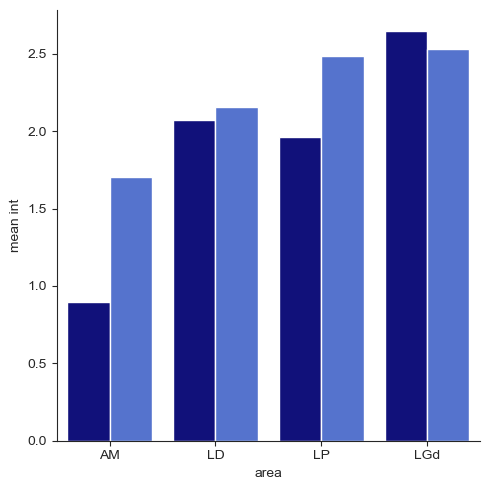

In [57]:
sns.set_style("ticks")
sns.catplot(data = int_log[int_log.grouped_area == 'Thal'],  x = 'area', y ='mean int', hue = 'target', kind="bar", legend=False, palette = palette)

plt.errorbar([-0.17,1-0.17,2-0.17,3-0.17], y = int_V1_log_Thal['mean int'].values, yerr = int_V1_errors_Thal, c= 'k',fmt='none')
plt.errorbar([0+0.2,1+0.2,2+0.2,3+0.2], y = int_PM_log_Thal['mean int'].values, yerr = int_PM_errors_Thal, c= 'k',fmt='none')

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(3, 5)

plt.ylabel('intercept', fontsize = 16)
plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.ylim(0, 4)



fig.savefig(os.path.join(figs45panelpaths, 'figS4_5b1v2.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs45panelpaths, 'figS4_5b1v2.eps'),  bbox_inches='tight', format = 'eps')

ValueError: 'yerr' must not contain negative values

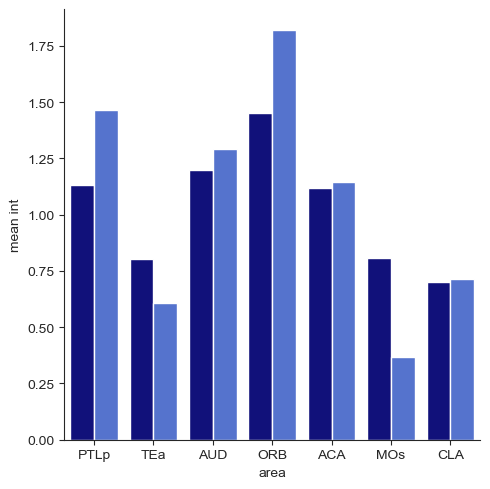

In [58]:
sns.catplot(data = int_log[int_log.grouped_area == 'Dist_ctx'],  x = 'area', y ='mean int', hue = 'target', kind="bar", legend=False, palette = palette)

plt.errorbar([-0.17, 1-0.17, 2-0.17, 3-0.17, 4-0.17, 5-0.17, 6-0.17], y = int_V1_log_Dist['mean int'].values, yerr = int_V1_errors_Dist, c= 'k',fmt='none')
plt.errorbar([0+0.2, 1+0.2, 2+0.2, 3+0.2, 4+0.2, 5+0.2, 6+0.2], y = int_PM_log_Dist['mean int'].values, yerr = int_PM_errors_Dist, c= 'k',fmt='none')  
                         
fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(5,5)

plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.ylim(0, 5)
ax.get_yaxis().set_visible(False)



fig.savefig(os.path.join(figs45panelpaths, 'figS4_5b2v2.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs45panelpaths, 'figS4_5b2v2.eps'),  bbox_inches='tight', format = 'eps')

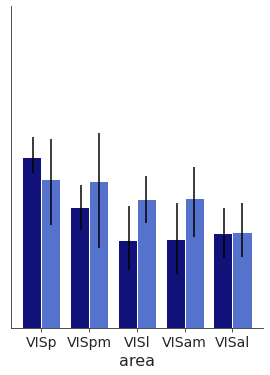

In [58]:
sns.catplot(data = int_log[int_log.grouped_area == 'VIS'],  x = 'area', y ='mean int', hue = 'target', kind="bar", legend=False, palette = palette)

plt.errorbar([-0.17, 1-0.17, 2-0.17, 3-0.17, 4-0.17], y = int_V1_log_VIS['mean int'].values, yerr = int_V1_errors_VIS, c= 'k',fmt='none')
plt.errorbar([0+0.2, 1+0.2, 2+0.2, 3+0.2, 4+0.2],y = int_PM_log_VIS['mean int'].values, yerr = int_PM_errors_VIS, c= 'k',fmt='none')     

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(4, 5)

plt.ylim(0, 5)

ax.get_yaxis().set_visible(False)

plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

ax.get_yaxis().set_visible(False)

fig.savefig(os.path.join(figs45panelpaths, 'figS4_5b3v2.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs45panelpaths, 'figS4_5b3v2.eps'),  bbox_inches='tight', format = 'eps')

<ErrorbarContainer object of 3 artists>

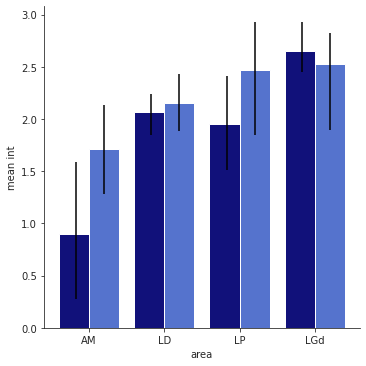

In [59]:
sns.catplot(data = int_log[int_log.grouped_area == 'Thal'],  x = 'area', y ='mean int', hue = 'target', kind="bar", legend=False, palette = palette)

plt.errorbar([-0.17,1-0.17,2-0.17,3-0.17], y = int_V1_log_Thal['mean int'].values, yerr = int_V1_errors_Thal, c= 'k',fmt='none')
plt.errorbar([0+0.2,1+0.2,2+0.2,3+0.2], y = int_PM_log_Thal['mean int'].values, yerr = int_PM_errors_Thal, c= 'k',fmt='none')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


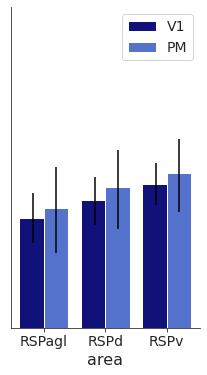

In [60]:
sns.catplot(data = int_log[int_log.grouped_area == 'RSP'],  x = 'area', y ='mean int', hue = 'target', kind="bar", legend=False, palette = palette)

plt.errorbar([-0.17, 1-0.17, 2-0.17], y = int_V1_log_RSP['mean int'].values, yerr = int_V1_errors_RSP, c= 'k',fmt='none')
plt.errorbar([0+0.2, 1+0.2, 2+0.2], y = int_PM_log_RSP['mean int'].values, yerr = int_PM_errors_RSP, c= 'k',fmt='none')     

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(3, 5)

plt.legend(loc = 'upper right', fontsize = 14)
plt.ylim(0, 5)

ax.get_yaxis().set_visible(False)

plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
ax.get_yaxis().set_visible(False)

fig.savefig(os.path.join(figs45panelpaths, 'figS4_5b4v2.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs45panelpaths, 'figS4_5b4v2.eps'),  bbox_inches='tight', format = 'eps')

In [61]:
boot_diff_int = pd.read_csv(os.path.join(paramspath, 'boot_difference_intercept.csv' ))

In [62]:
boot_diff_int_lin = pd.read_csv(os.path.join(paramspath, 'boot_difference_intercept_lin.csv' ))

In [63]:
boot_diff_int_lin

,Unnamed: 0,low,high
0,LGd,-273.517685,481.687968


In [64]:
boot_diff_int

,Unnamed: 0,low,high
0,VISp,-0.340365,1.110157
1,VISpm,-1.231582,0.658988
2,VISl,-1.255216,-0.034783
3,VISam,-1.391504,0.174434
4,VISal,-0.616745,0.516757
5,RSPagl,-0.902525,0.633910
6,RSPd,-0.879355,0.572520
7,RSPv,-0.789979,0.530879
8,AM,-1.620222,-0.051774
9,LD,-0.425106,0.259329


# Panel C - V1 vs PM based on convergence index

In [65]:
df_ci_s = pd.read_hdf(os.path.join(fracpath, 'df_ci_stacked.h5'))

In [66]:
result_ci = df_ci_s.groupby(['area', 'target_area'], as_index=False).agg(
                      {'ci':['mean','std', 'count']})

In [67]:
df_ci_s=df_ci_s[(df_ci_s['target_area']=='V1') | (df_ci_s['target_area']=='PM')]

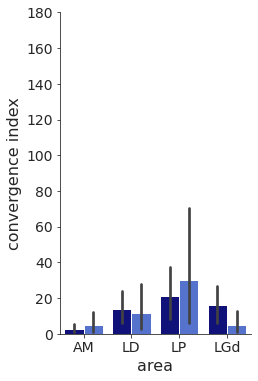

In [68]:
sns.set_style("ticks")
sns.catplot(data = df_ci_s[df_ci_s.grouped_area == 'Thal'],  x = 'area', y ='ci', hue = 'target_area', kind="bar", legend=False, palette = palette)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(3, 5)

plt.ylabel('convergence index', fontsize = 16)
plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.ylim(0,180)

fig.savefig(os.path.join(figs45panelpaths, 'figS4_5c1_v2.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs45panelpaths, 'figS4_5c1_v2.eps'),  bbox_inches='tight', format = 'eps')

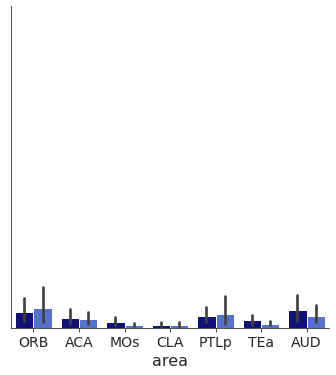

In [69]:
sns.catplot(data = df_ci_s[df_ci_s.grouped_area == 'Dist_ctx'],  x = 'area', y ='ci', hue = 'target_area', kind="bar", legend=False, palette = palette)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(5,5)
plt.ylabel('convergence index', fontsize = 16)
plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.ylim(0, 180)
ax.get_yaxis().set_visible(False)

fig.savefig(os.path.join(figs45panelpaths, 'figS4_5c2v2.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs45panelpaths, 'figS4_5c2v2.eps'),  bbox_inches='tight', format = 'eps')

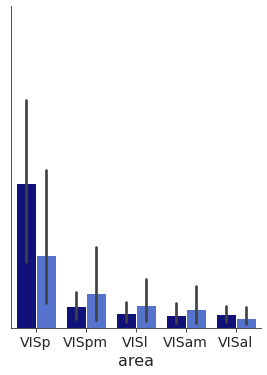

In [70]:
sns.catplot(data = df_ci_s[df_ci_s.grouped_area == 'VIS'],  x = 'area', y ='ci', hue = 'target_area', kind="bar", legend=False, palette = palette)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(4, 5)
plt.ylim(0, 180)


plt.ylabel('convergence index', fontsize = 16)
plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
ax.get_yaxis().set_visible(False)

fig.savefig(os.path.join(figs45panelpaths, 'figS4_5c3v2.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs45panelpaths, 'figS4_5c3v2.eps'),  bbox_inches='tight', format = 'eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


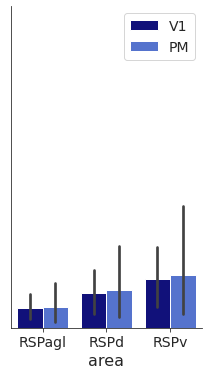

In [71]:
sns.catplot(data = df_ci_s[df_ci_s.grouped_area == 'RSP'],  x = 'area', y ='ci', hue = 'target_area', kind="bar", legend=False, palette = palette)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(3, 5)

plt.legend(loc = 'upper right', fontsize = 14)
plt.ylim(0, 180)


plt.ylabel('convergence index', fontsize = 16)
plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
ax.get_yaxis().set_visible(False)

fig.savefig(os.path.join(figs45panelpaths, 'figS4_5c4v2.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs45panelpaths, 'figS4_5c4v2.eps'),  bbox_inches='tight', format = 'eps')